### Business Problem- Develop a machine learning program to identify when an article might be fake news. 

### Data Collection - Data is collected from Kaggle, we have only used the train data.
Url for the Dataset: https://www.kaggle.com/c/fake-news/data#
* 'label' is our target feature

In [1]:
## import libraries
import pandas as pd

In [2]:
## Read the data
df=pd.read_csv('fake_news.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
## check the shape of data
df.shape

(20800, 5)

In [4]:
## Get the Independent Features
X=df.drop('label',axis=1)
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [5]:
## Get the Dependent features
y=df['label']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

### Text Preprocessing

In [6]:
## import libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [7]:
## drop out missing values
df=df.dropna()

In [8]:
## since we dropped out some records we have to reset the index now
messages=df.copy()
messages.reset_index(inplace=True)
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [9]:
## create corpus
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i]) ##substitue everything with blank except a-z & A-Z
    review = review.lower()
    review = review.split() ## list of words
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]#remove stopwords & do stemming
    review = ' '.join(review)
    corpus.append(review)

In [10]:
## check corpus
corpus[3]

'video civilian kill singl us airstrik identifi rate civilian kill american airstrik afghanistan higher us engag activ combat oper photo hellfir missil load onto us militari reaper drone afghanistan staff sgt brian ferguson u air forc bureau abl identifi civilian kill singl us drone strike afghanistan last month biggest loss civilian life one strike sinc attack medecin san frontier hospit msf last octob us claim conduct counter terror strike islam state fighter hit nangarhar provinc missil septemb next day unit nation issu unusu rapid strong statement say strike kill civilian injur other gather hous celebr tribal elder return pilgrimag mecca bureau spoke man name haji rai said owner hous target said peopl kill other injur provid name list bureau abl independ verifi ident die rai son headmast local school among anoth man abdul hakim lost three son attack rai said involv deni us claim member visit hous strike said even speak sort peopl phone let alon receiv hous death amount biggest conf

In [11]:
## Applying CountVectorizer
## creating bag of words model
cv=CountVectorizer(max_features=9000,ngram_range=(1,3))
X=cv.fit_transform(corpus).toarray()

In [12]:
## check the shape of X
X.shape

(18285, 9000)

In [13]:
## Create the target variable
y=messages.label

In [14]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [15]:
## see top 10 feature names
cv.get_feature_names()[:20]

['aaron',
 'aaron klein',
 'abandon',
 'abba',
 'abbott',
 'abc',
 'abc news',
 'abduct',
 'abdullah',
 'abe',
 'abedin',
 'abid',
 'abil',
 'abl',
 'abl get',
 'aboard',
 'abolish',
 'abort',
 'abraham',
 'abram']

In [17]:
## check params
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 9000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [19]:
## create a dataframe with dependent fatures
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())
count_df.head()

,aaron,aaron klein,abandon,abba,abbott,abc,abc news,abduct,abdullah,abe,...,zealand,zero,zero hedg,zika,zika viru,zionist,zone,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
## import matplotlib
import matplotlib.pyplot as plt

In [21]:
## create function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### MultinomialNB Algorithm

In [22]:
## import libraries
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [23]:
## import libraries
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.912
Confusion matrix, without normalization


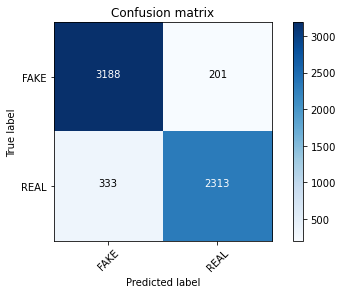

In [24]:
## Fit and evaluate model
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [25]:
## Check accuracy score
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9115161557580779

In [26]:
## check the shape of target variable
y_train.shape

(12250,)

### Passive Aggressive Classifier Algorithm

In [28]:
## instantiate model
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

accuracy:   0.939
Confusion matrix, without normalization


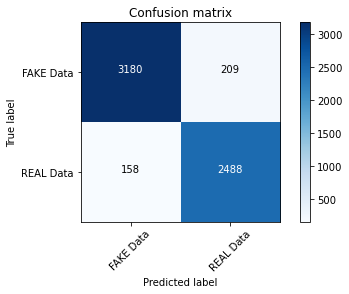

In [29]:
## Fit and evaluate model
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

### Multinomial Classifier with Hyperparameter tuning

In [30]:
## Instantiate model
classifier=MultinomialNB(alpha=0.1)

In [31]:
## print accuracy score for different values of alpha
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/Users/komalrungta/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0, Score : 0.9163214581607291
Alpha: 0.1, Score : 0.9121789560894781
Alpha: 0.2, Score : 0.911847555923778
Alpha: 0.30000000000000004, Score : 0.911847555923778
Alpha: 0.4, Score : 0.911847555923778
Alpha: 0.5, Score : 0.9115161557580779
Alpha: 0.6000000000000001, Score : 0.9116818558409279
Alpha: 0.7000000000000001, Score : 0.9116818558409279
Alpha: 0.8, Score : 0.9116818558409279
Alpha: 0.9, Score : 0.9115161557580779


In [32]:
## Get Features names
feature_names = cv.get_feature_names()

In [33]:
## check the coefficient
classifier.coef_[0]

/Users/komalrungta/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([-10.73067667, -12.1238282 ,  -9.22482914, ..., -12.58106958,
        -9.45062907, -10.87763988])

In [34]:
### Most real (values are less negative)
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-5.156342388583193, 'trump'),
 (-5.188395288832204, 'clinton'),
 (-5.335094112080373, 'peopl'),
 (-5.345481765342885, 'one'),
 (-5.403740858230336, 'state'),
 (-5.479477179520657, 'us'),
 (-5.489435987110765, 'would'),
 (-5.602153733899344, 'like'),
 (-5.613283207210639, 'hillari'),
 (-5.6374576584741, 'time'),
 (-5.716267188988539, 'elect'),
 (-5.726608070990599, 'year'),
 (-5.780625189146106, 'said'),
 (-5.791004951161289, 'american'),
 (-5.853742001642614, 'new'),
 (-5.895570566452147, 'use'),
 (-5.901743537632765, 'also'),
 (-5.905758214825594, 'presid'),
 (-5.929254319212779, 'world'),
 (-5.933945287397588, 'go')]

In [35]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:50]

[(-14.617951508784618, 'accord mr'),
 (-14.617951508784618, 'advis mr'),
 (-14.617951508784618, 'ago mr'),
 (-14.617951508784618, 'airbag'),
 (-14.617951508784618, 'antidop'),
 (-14.617951508784618, 'attorney gener jeff'),
 (-14.617951508784618, 'author igcolonel'),
 (-14.617951508784618, 'author igcolonel hotmail'),
 (-14.617951508784618, 'awr'),
 (-14.617951508784618, 'awr hawkin'),
 (-14.617951508784618, 'awrhawkin'),
 (-14.617951508784618, 'back last night'),
 (-14.617951508784618, 'ben kew'),
 (-14.617951508784618, 'breitbart tech'),
 (-14.617951508784618, 'breitbart texa found'),
 (-14.617951508784618, 'breitbart texa team'),
 (-14.617951508784618, 'brief email'),
 (-14.617951508784618, 'brief email good'),
 (-14.617951508784618, 'brief like'),
 (-14.617951508784618, 'brief like want'),
 (-14.617951508784618, 'brief nytim'),
 (-14.617951508784618, 'brief nytim com'),
 (-14.617951508784618, 'brief post'),
 (-14.617951508784618, 'brief post eastern'),
 (-14.617951508784618, 'brief 